### Part 1) Image Classification

#### Set Random Seed, Load MNIST Data

In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
from keras import layers
from keras import models
from keras import optimizers
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
random.seed(1234)

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
# convert to 0s and 1s
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [9]:
# split the training data 
train_images, valid_images, train_labels, valid_labels = \
    train_test_split(train_images, train_labels, test_size = .16666, random_state = 1234)

#### Implement a series of neural network models

In [35]:
# define the model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# fit
result = model.fit(train_images, train_labels, epochs=200, batch_size=512, validation_data=(valid_images,valid_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.5043 - acc: 0.8406 - val_loss: 0.2845 - val_acc: 0.9074
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1565 - acc: 0.9521 - val_loss: 0.1123 - val_acc: 0.9664
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1003 - acc: 0.9695 - val_loss: 0.1022 - val_acc: 0.9690
Epoch 4/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0662 - acc: 0.9797 - val_loss: 0.1245 - val_acc: 0.9636
Epoch 5/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0480 - acc: 0.9852 - val_loss: 0.1033 - val_acc: 0.9688
Epoch 6/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0376 - acc: 0.9883 - val_loss: 0.0767 - val_acc: 0.9780
Epoch 7/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0301 - acc: 0.9915 - val_loss: 0.0895 - 

Epoch 118/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0079 - acc: 0.9991 - val_loss: 0.1690 - val_acc: 0.9826
Epoch 119/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0063 - acc: 0.9991 - val_loss: 0.1709 - val_acc: 0.9822
Epoch 120/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.1718 - val_acc: 0.9831
Epoch 121/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0048 - acc: 0.9993 - val_loss: 0.1887 - val_acc: 0.9829
Epoch 122/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0049 - acc: 0.9994 - val_loss: 0.2081 - val_acc: 0.9816
Epoch 123/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0061 - acc: 0.9992 - val_loss: 0.1866 - val_acc: 0.9828
Epoch 124/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0062 - acc: 0.9992 - val_loss: 0.1635 - val_acc: 0.9832
Epoch 125/200
50000/

In [45]:
# plotting the training and validation loss
training_error = result.history['val_loss']
training_accuracy = result.history['val_acc']
result_dict.keys()

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])

In [53]:
epochs = range(1, 201)

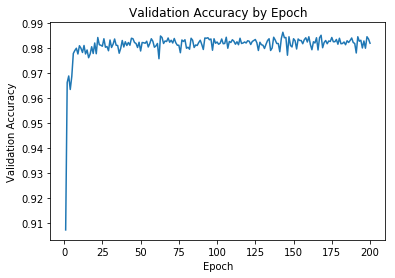

In [54]:
plt.plot(epochs, training_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy by Epoch");

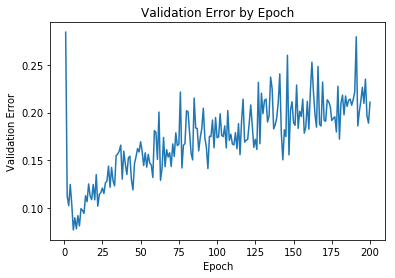

In [56]:
plt.plot(epochs, training_error)
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.title("Validation Error by Epoch");

Answer goes here

#### Implement dropout

In [10]:
# add the drop out to all layers except the last
dropout_model = models.Sequential()

dropout_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dropout_model.add(layers.Dropout(0.5))

dropout_model.add(layers.Dense(512, activation='relu'))
dropout_model.add(layers.Dropout(0.5))

dropout_model.add(layers.Dense(512, activation='relu'))
dropout_model.add(layers.Dropout(0.5))

dropout_model.add(layers.Dense(512, activation='relu'))
dropout_model.add(layers.Dropout(0.5))

dropout_model.add(layers.Dense(10, activation='softmax'))

In [13]:
# compile the model
dropout_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# fit
dropout_result = dropout_model.fit(train_images, train_labels, epochs=200, batch_size=512, validation_data=(valid_images,valid_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 23us/step - loss: 0.0689 - acc: 0.9861 - val_loss: 0.0845 - val_acc: 0.9815
Epoch 2/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0566 - acc: 0.9870 - val_loss: 0.0790 - val_acc: 0.9833
Epoch 3/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0538 - acc: 0.9876 - val_loss: 0.0793 - val_acc: 0.9835
Epoch 4/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0509 - acc: 0.9883 - val_loss: 0.0792 - val_acc: 0.9823
Epoch 5/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0517 - acc: 0.9881 - val_loss: 0.0781 - val_acc: 0.9831
Epoch 6/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0517 - acc: 0.9881 - val_loss: 0.0850 - val_acc: 0.9829
Epoch 7/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0522 - acc: 0.9888 - val_loss: 0.0823 - 

50000/50000 [==============================] - 1s 17us/step - loss: 0.0600 - acc: 0.9901 - val_loss: 0.1244 - val_acc: 0.9813
Epoch 60/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0577 - acc: 0.9908 - val_loss: 0.1199 - val_acc: 0.9824
Epoch 61/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0490 - acc: 0.9919 - val_loss: 0.1074 - val_acc: 0.9832
Epoch 62/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0586 - acc: 0.9914 - val_loss: 0.1114 - val_acc: 0.9826
Epoch 63/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0511 - acc: 0.9914 - val_loss: 0.1213 - val_acc: 0.9831
Epoch 64/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0494 - acc: 0.9923 - val_loss: 0.1206 - val_acc: 0.9826
Epoch 65/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0574 - acc: 0.9913 - val_loss: 0.1228 - val_acc: 0.9816
Epoch 66/200
50000/50000 [==============

Epoch 118/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0644 - acc: 0.9918 - val_loss: 0.1421 - val_acc: 0.9847
Epoch 119/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0760 - acc: 0.9912 - val_loss: 0.1563 - val_acc: 0.9841
Epoch 120/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0710 - acc: 0.9917 - val_loss: 0.1580 - val_acc: 0.9829
Epoch 121/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0803 - acc: 0.9906 - val_loss: 0.1470 - val_acc: 0.9836
Epoch 122/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0663 - acc: 0.9918 - val_loss: 0.1578 - val_acc: 0.9822
Epoch 123/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0756 - acc: 0.9909 - val_loss: 0.1464 - val_acc: 0.9843
Epoch 124/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0728 - acc: 0.9913 - val_loss: 0.1434 - val_acc: 0.9846
Epoch 125/200
50000/

50000/50000 [==============================] - 1s 17us/step - loss: 0.0824 - acc: 0.9914 - val_loss: 0.1603 - val_acc: 0.9843
Epoch 177/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0884 - acc: 0.9914 - val_loss: 0.1786 - val_acc: 0.9836
Epoch 178/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0964 - acc: 0.9908 - val_loss: 0.1824 - val_acc: 0.9840
Epoch 179/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0915 - acc: 0.9911 - val_loss: 0.1785 - val_acc: 0.9830
Epoch 180/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0898 - acc: 0.9913 - val_loss: 0.1839 - val_acc: 0.9830
Epoch 181/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0946 - acc: 0.9906 - val_loss: 0.1905 - val_acc: 0.9825
Epoch 182/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0908 - acc: 0.9912 - val_loss: 0.2061 - val_acc: 0.9826
Epoch 183/200
50000/50000 [=======

In [24]:
# plotting the training and validation loss
drop_training_error = dropout_result.history['val_loss']
drop_training_accuracy = dropout_result.history['val_acc']

epochs = range(1, 201)

(0.96, 0.99)

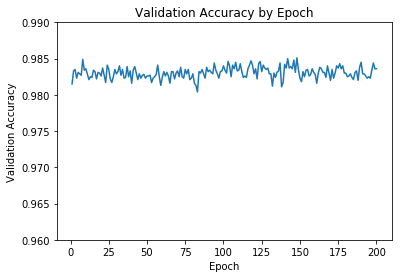

In [25]:
plt.plot(epochs, drop_training_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy by Epoch")
plt.ylim(0.96, 0.99)

Text(0.5,1,'Validation Error by Epoch')

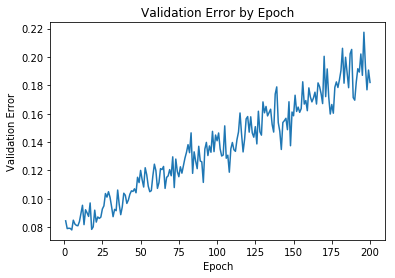

In [26]:
plt.plot(epochs, drop_training_error)
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.title("Validation Error by Epoch")

Answer goes here

#### Weight regularization

In [31]:
from keras import regularizers

In [33]:
# L1 regularization
l1_model = models.Sequential()
l1_model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(28 * 28,)))

l1_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
l1_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
l1_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))

l1_model.add(layers.Dense(10, activation='softmax'))

# L2 regularization
l2_model = models.Sequential()

l2_model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28,)))

l2_model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))


l2_model.add(layers.Dense(10, activation='softmax'))

In [36]:
# Fit the model
l1_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l1_fit = l1_model.fit(train_images, train_labels, epochs=200, batch_size=512, validation_data=(valid_images,valid_labels))

l2_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l2_fit = l2_model.fit(train_images, train_labels, epochs=200, batch_size=512, validation_data=(valid_images,valid_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.9733 - acc: 0.9508 - val_loss: 0.4688 - val_acc: 0.9504
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.6112 - acc: 0.9564 - val_loss: 0.5023 - val_acc: 0.9406
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5972 - acc: 0.9556 - val_loss: 0.4685 - val_acc: 0.9510
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5961 - acc: 0.9562 - val_loss: 0.4623 - val_acc: 0.9526
Epoch 5/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5959 - acc: 0.9564 - val_loss: 0.5244 - val_acc: 0.9340
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5968 - acc: 0.9560 - val_loss: 0.4859 - val_acc: 0.9436
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5988 - acc: 0.9551 - val_loss: 0.5014 - 

50000/50000 [==============================] - 1s 16us/step - loss: 0.5837 - acc: 0.9580 - val_loss: 0.4570 - val_acc: 0.9552
Epoch 60/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5829 - acc: 0.9585 - val_loss: 0.4858 - val_acc: 0.9490
Epoch 61/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5844 - acc: 0.9576 - val_loss: 0.5609 - val_acc: 0.9240
Epoch 62/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5814 - acc: 0.9585 - val_loss: 0.4543 - val_acc: 0.9539
Epoch 63/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5810 - acc: 0.9582 - val_loss: 0.4741 - val_acc: 0.9494
Epoch 64/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5824 - acc: 0.9577 - val_loss: 0.5573 - val_acc: 0.9230
Epoch 65/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5826 - acc: 0.9584 - val_loss: 0.5240 - val_acc: 0.9323
Epoch 66/200
50000/50000 [==============

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5744 - acc: 0.9589 - val_loss: 0.5223 - val_acc: 0.9345
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5735 - acc: 0.9591 - val_loss: 0.4886 - val_acc: 0.9431
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5704 - acc: 0.9594 - val_loss: 0.4716 - val_acc: 0.9498
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5744 - acc: 0.9574 - val_loss: 0.4441 - val_acc: 0.9587
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5738 - acc: 0.9589 - val_loss: 0.5036 - val_acc: 0.9409
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5731 - acc: 0.9580 - val_loss: 0.4789 - val_acc: 0.9455
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5725 - acc: 0.9585 - val_loss: 0.4432 - val_acc: 0.9567
Epoch 125/200
50000/

50000/50000 [==============================] - 1s 16us/step - loss: 0.5660 - acc: 0.9595 - val_loss: 0.4323 - val_acc: 0.9594
Epoch 177/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5645 - acc: 0.9611 - val_loss: 0.4581 - val_acc: 0.9527
Epoch 178/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5656 - acc: 0.9603 - val_loss: 0.5038 - val_acc: 0.9392
Epoch 179/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5651 - acc: 0.9603 - val_loss: 0.4413 - val_acc: 0.9574
Epoch 180/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5659 - acc: 0.9603 - val_loss: 0.4738 - val_acc: 0.9465
Epoch 181/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5645 - acc: 0.9610 - val_loss: 0.4306 - val_acc: 0.9600
Epoch 182/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5656 - acc: 0.9600 - val_loss: 0.4560 - val_acc: 0.9514
Epoch 183/200
50000/50000 [=======

50000/50000 [==============================] - 1s 16us/step - loss: 0.0818 - acc: 0.9918 - val_loss: 0.1501 - val_acc: 0.9726
Epoch 35/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0856 - acc: 0.9910 - val_loss: 0.1248 - val_acc: 0.9785
Epoch 36/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0818 - acc: 0.9918 - val_loss: 0.1261 - val_acc: 0.9777
Epoch 37/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0800 - acc: 0.9925 - val_loss: 0.1511 - val_acc: 0.9714
Epoch 38/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0816 - acc: 0.9917 - val_loss: 0.1417 - val_acc: 0.9751
Epoch 39/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0811 - acc: 0.9922 - val_loss: 0.1320 - val_acc: 0.9784
Epoch 40/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0813 - acc: 0.9923 - val_loss: 0.1233 - val_acc: 0.9788
Epoch 41/200
50000/50000 [==============

50000/50000 [==============================] - 1s 16us/step - loss: 0.0800 - acc: 0.9915 - val_loss: 0.1635 - val_acc: 0.9688
Epoch 94/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0720 - acc: 0.9938 - val_loss: 0.1218 - val_acc: 0.9783
Epoch 95/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0771 - acc: 0.9919 - val_loss: 0.1581 - val_acc: 0.9697
Epoch 96/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0771 - acc: 0.9921 - val_loss: 0.1372 - val_acc: 0.9750
Epoch 97/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0757 - acc: 0.9922 - val_loss: 0.1739 - val_acc: 0.9662
Epoch 98/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0753 - acc: 0.9928 - val_loss: 0.1234 - val_acc: 0.9783
Epoch 99/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0746 - acc: 0.9926 - val_loss: 0.1526 - val_acc: 0.9704
Epoch 100/200
50000/50000 [=============

50000/50000 [==============================] - 1s 16us/step - loss: 0.0748 - acc: 0.9922 - val_loss: 0.1746 - val_acc: 0.9617
Epoch 152/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0739 - acc: 0.9926 - val_loss: 0.1240 - val_acc: 0.9788
Epoch 153/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0734 - acc: 0.9927 - val_loss: 0.1326 - val_acc: 0.9745
Epoch 154/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0743 - acc: 0.9926 - val_loss: 0.1110 - val_acc: 0.9807
Epoch 155/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0783 - acc: 0.9913 - val_loss: 0.1123 - val_acc: 0.9807
Epoch 156/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0712 - acc: 0.9934 - val_loss: 0.1213 - val_acc: 0.9773
Epoch 157/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0734 - acc: 0.9929 - val_loss: 0.1300 - val_acc: 0.9765
Epoch 158/200
50000/50000 [=======